### MultiClass Classification (Reuters)

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


### Preparing the data

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
    

`Inbuilt way of one hot encoding using Keras`

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
    

### Building the Network

The best loss function to use in this case is categorical_crossentropy. 
It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output some- thing as close as possible to the true labels.

In [5]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Validating your approach

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training the model

In [7]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 272us/step - loss: 2.5324 - acc: 0.4959 - val_loss: 1.7213 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.4457 - acc: 0.6879 - val_loss: 1.3469 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.0964 - acc: 0.7652 - val_loss: 1.1711 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.8705 - acc: 0.8153 - val_loss: 1.0782 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.7041 - acc: 0.8469 - val_loss: 0.9850 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.5677 - acc: 0.8802 - val_loss: 0.9415 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.4603 - a

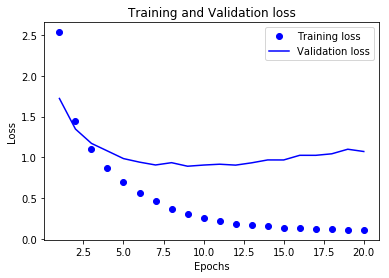

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

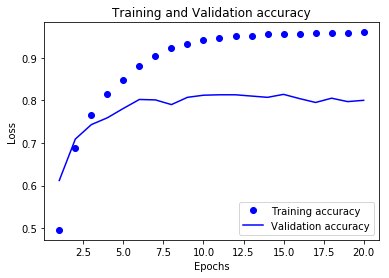

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs,acc, 'bo', label='Training accuracy')
plt.plot(epochs,val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfitting begins after nine epochs`

### Retraining model from scratch

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

results = model.evaluate(x_test,one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 264us/step - loss: 2.6600 - acc: 0.5436 - val_loss: 1.7432 - val_acc: 0.6390
Epoch 2/9
7982/7982 [==============================] - 1s 129us/step - loss: 1.4218 - acc: 0.7088 - val_loss: 1.3105 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 120us/step - loss: 1.0505 - acc: 0.7790 - val_loss: 1.1281 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.8364 - acc: 0.8217 - val_loss: 1.0574 - val_acc: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.6721 - acc: 0.8557 - val_loss: 0.9893 - val_acc: 0.7790
Epoch 6/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.5385 - acc: 0.8896 - val_loss: 0.9249 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.4322 - acc: 0.9084 - val_loss: 0.9274 - val_acc: 0.7980
Epoch 8

[0.996532478188152, 0.7813891362422084]

* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
    – Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    – Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
* If you need to classify data into a large number of categories, you should avoid
  creating information bottlenecks in your network due to intermediate layers that are too small.